# Vision Tarea 20
#### Daniel Castro Pineda 2220220H

### Dada una imagen de 512 x 512 pixeles hacer la compresión de la imagen para que la imagen comprimida tenga 10 veces menos no-ceros que los no-ceros de la imagen original. Para ello hay que calcular el umbral T para que esto suceda. Hacer el procedimiento utilizando.

In [17]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fftpack as fft
from ipywidgets import interact, fixed

import urllib.request
from time import perf_counter

In [2]:
req = urllib.request.urlopen(
    'https://picsum.photos/512/512.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Función para mostrar 2 imágenes, la original y su espectro.

In [3]:
def mostrarimg(im_1, title_1, im_2, title_2):
    """
    Muestra dos imágenes en una misma figura.
    """
    plt.figure(figsize=(12,6))                   
    plt.subplot(1,2,1) 
    plt.title(title_1)       
    plt.imshow(im_1, cmap="gray")                 
    plt.subplot(1,2,2) ; 
    plt.title(title_2)       
    plt.imshow(im_2, cmap="gray")  
    plt.show()

## a) La Transformada Rápida de Fourier

In [37]:
def Fourier_threshold(gray, T=10, small=False):
    Nr, Nc = gray.shape
    if (small):
        fftImg = fft.fft2(gray) / (float)(Nr * Nc)
    else:
        fftImg = fft.fft2(gray)
    im_fft2 = fftImg*(abs(fftImg) >= T)
    imgCompressed = fft.ifft2(im_fft2).real
    fftImgC = fft.fft2(imgCompressed)

    mostrarimg(gray, "Imagen original", np.log10(
        fftImg + 1e-9).real, "Espectro de frecuencias")
    mostrarimg(imgCompressed, "Imagen con compresión", np.log10(
        fftImgC + 1e-9).real, "Espectro de frecuencias")

    pixOrigi = np.count_nonzero(fftImg)
    pixCompress = np.count_nonzero(im_fft2)

    print("Pixeles no cero original: \t", pixOrigi)
    print("Pixeles no cero compresion TDC\t: ", pixCompress)
    print("Porcentaje de compresion: ", (pixOrigi)/pixCompress)


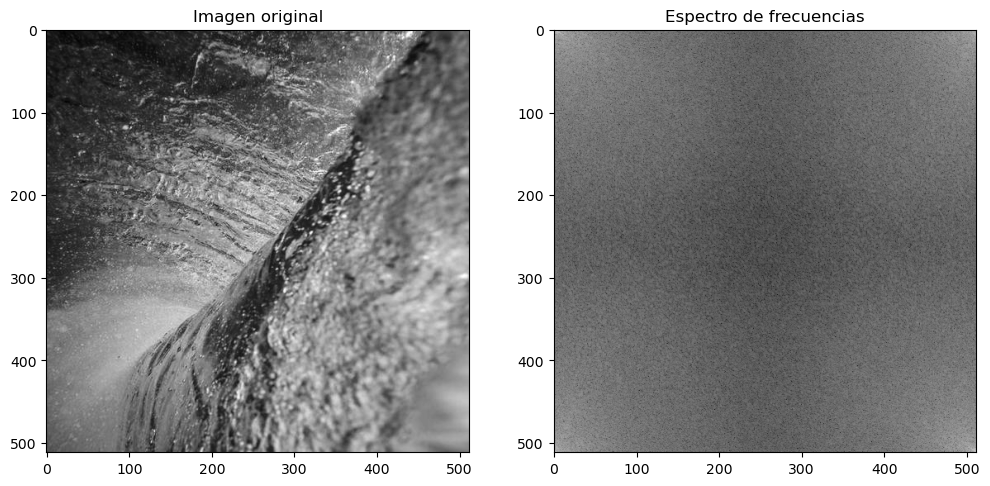

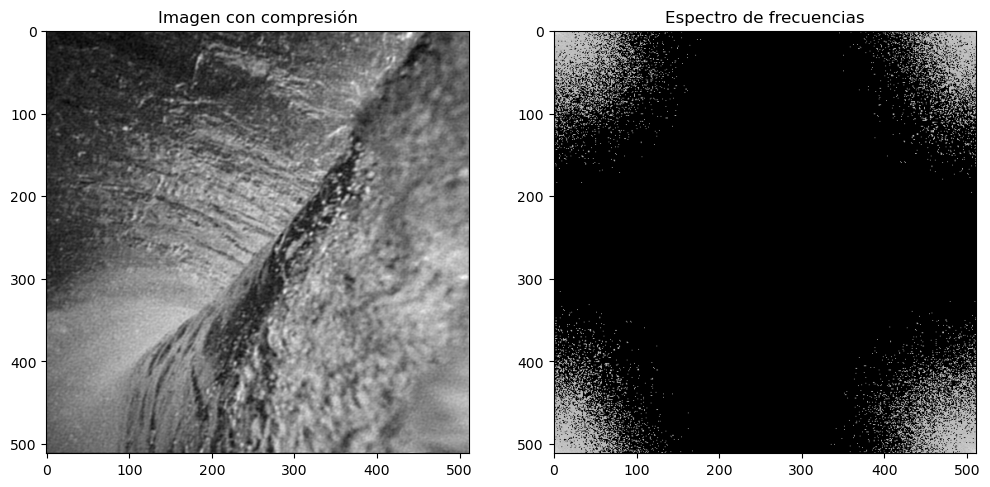

Pixeles no cero original: 	 262144
Pixeles no cero compresion TDC	:  24470
Porcentaje de compresion:  10.712872905598692


In [46]:
Fourier_threshold(gray, .055, True)

### Con el siguiente widget podemos interactuar con los valores del umbral para la FFT y ver como se comporta el espectro.

In [48]:
interact(Fourier_threshold,gray=fixed(gray),T=(0,50000,100),small=fixed(False))

interactive(children=(IntSlider(value=10, description='T', max=50000, step=100), Output()), _dom_classes=('wid…

<function __main__.Fourier_threshold(gray, T=10, small=False)>

## b) La Transformada Rápida de Coseno

In [35]:
def TDC_threshold(gray, T, small=False):
    Nr, Nc = gray.shape
    if (small):
        tdcImg = fft.dctn(gray, norm='ortho') / (float)(Nr * Nc)
    else:
        tdcImg = fft.dctn(gray, norm='ortho')
    logtdc = np.log10(1e-9 + abs(tdcImg))
    mostrarimg(gray, "Imagen original", logtdc, "Espectro TDC")
    im_TDC = tdcImg*(abs(tdcImg) >= T)
    imgCompressed = fft.idctn(im_TDC, norm='ortho').real

    logtdcC = np.log10(1e-9 + abs(im_TDC))

    mostrarimg(imgCompressed, "Imagen original",
               logtdcC, "Espectro TDC con umbral")
    

    pixCompress = np.count_nonzero(im_TDC)
    pixOrigi = np.count_nonzero(tdcImg)

    print("Pixeles no cero original: \t", pixOrigi)
    print("Pixeles no cero compresion TDC\t: ", pixCompress)
    print("Porcentaje de compresion: ", (pixOrigi)/pixCompress)

    # return tdcImg

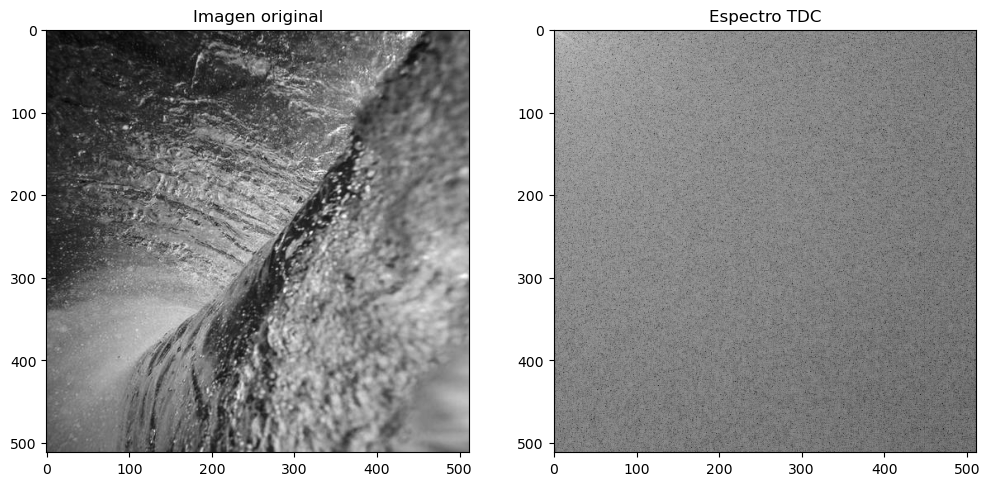

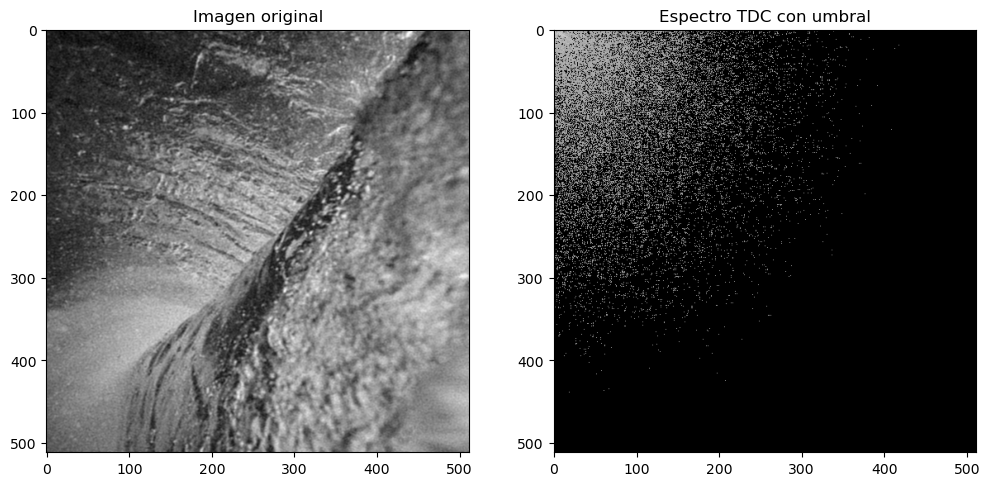

Pixeles no cero original: 	 262144
Pixeles no cero compresion TDC	:  24447
Porcentaje de compresion:  10.72295169141408


In [57]:
tdcImg = TDC_threshold(gray,0.000101,small=True)

## Con el siguiente slider podemos interactuar con los valores del umbral para la TDC y ver como se comporta el espectro.

In [59]:
interact(TDC_threshold,gray=fixed(gray),T=(0,100,1),small=fixed(False))

interactive(children=(IntSlider(value=50, description='T'), Output()), _dom_classes=('widget-interact',))

<function __main__.TDC_threshold(gray, T, small=False)>